   No.      Time           Source      Destination Protocol  Length  \
0    1  0.000000      192.168.1.2  212.204.214.114      IRC      96   
1    2  0.125852  212.204.214.114      192.168.1.2      TCP      66   
2    3  0.137361  212.204.214.114      192.168.1.2      IRC     112   
3    4  0.137413      192.168.1.2  212.204.214.114      TCP      66   
4    5  0.235960      192.168.1.2      192.168.1.1      DNS      84   

                                                Info  
0                                     Request (ISON)  
1  6667  >  2848 [ACK] Seq=1 Ack=31 Win=57890 Len...  
2                                     Response (303)  
3  2848  >  6667 [ACK] Seq=31 Ack=47 Win=8011 Len...  
4  Standard query 0x311f PTR 2.1.168.192.in-addr....  


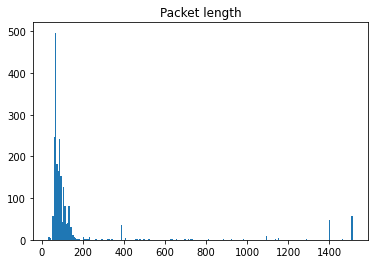

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Read CSV file into DataFrame df
df = pd.read_csv('data/pcap.csv') #, index_col=0)
# "No.","Time","Source","Destination","Protocol","Length","Info"
df["No."] = pd.to_numeric(df["No."])
df["Time"] = pd.to_numeric(df["Time"])
df["Length"] = pd.to_numeric(df["Length"])
print(df.head())
plt.title("Packet length")
_ = plt.hist(df["Length"], bins='auto')

In [32]:
print(f"Packet length > 200: {len(df.query('Length > 200'))}")

Packet length > 200: 211


In [85]:
SAMPLE_SIZE = 50
N_SAMPLES = 100
TOTAL_PACKETS = len(df)
exp_packets = 211

variance = lambda c, n: (TOTAL_PACKETS**2) * (c * (1 - c/n))/(n*(n-1))
v = 0

print(f"{'number in class':<20}{'variance':<10}{'is in interval':<10}")
for n in range(N_SAMPLES):
    c = len(df["Length"].sample(SAMPLE_SIZE).to_frame().query("Length > 200"))
    N_c = c/SAMPLE_SIZE*TOTAL_PACKETS
    sigma_sq = variance(c, SAMPLE_SIZE)
    is_in_range = N_c - 1.96 * sqrt(sigma_sq) <= exp_packets <= N_c + 1.96 * sqrt(sigma_sq)
#     print(f"{N_c:<20.2f}{sigma_sq:<10.2f}{str(is_in_range):<10}")
    if not is_in_range:
        v += 1
print(v/100)

number in class     variance  is in interval
0.04


True